1. 청년다방, 태영생막창, 에머이, 감성타코 의 COMPANY_ID 리스트 뽑기 -ok 
2. COMPANY_ID의 REVISIT DATA 뽑기
 - ID기준 1백만개씩 가져온다.
 - 1백만개 내에서 4개의 각 브랜드별 결제데이터를 걸러 각 DF에 누적하기
3. DF를 시점별로 나눠서 저장한다....
 * 아니면 애초에 시점별로 나눠서 각자 저장?


In [12]:
import pymysql, pandas as pd

In [14]:
corp_list = ['청년다방','태영생막창','에머이','감성타코'] #corp_id_list = []

type(corp_list[0]) # str
conn = pymysql.connect(host='133.186.143.151', port=13306, user='eums', password='eums00!q', db='eums-shared', charset='utf8')
curs = conn.cursor(pymysql.cursors.DictCursor)
curs.execute("select * FROM MEUMS_COMPANY WHERE co_name regexp '청년다방|태영생막창|에머이|감성타코';") #ID AS COMPANY_ID
temp = pd.DataFrame(curs.fetchall())
# curs.execute("select ID AS COMPANY_ID FROM MEUMS_COMPANY WHERE CATE_CODE = 'C12' AND co_name regexp '"+corp_list[0]+"' limit 10;")
# list1 = pd.DataFrame(curs.fetchall())
# curs.execute("select ID AS COMPANY_ID FROM MEUMS_COMPANY WHERE CATE_CODE = 'C12' AND co_name regexp '"+corp_list[1]+"' limit 10;")
# list2 = pd.DataFrame(curs.fetchall())
# curs.execute("select ID AS COMPANY_ID FROM MEUMS_COMPANY WHERE CATE_CODE = 'C12' AND co_name regexp '"+corp_list[2]+"' limit 10;")
# list3 = pd.DataFrame(curs.fetchall())
# curs.execute("select ID AS COMPANY_ID FROM MEUMS_COMPANY WHERE CATE_CODE = 'C12' AND co_name regexp '"+corp_list[3]+"' limit 10;")
# list4 = pd.DataFrame(curs.fetchall())
conn.close()

In [15]:
temp['COMPANY_ID']=temp['ID']
temp['CO_NAME'].head()

0    감성타코앤그릴 신사점
1     청년다방서울숭실대점
2          태영생막창
3      청년다방 망원역점
4      태영생막창서울본점
Name: CO_NAME, dtype: object

In [18]:
from datetime import datetime, timedelta
import pickle
# List= list1.COMPANY_ID.unique().tolist()
# len(List)

In [19]:
List = temp.COMPANY_ID.unique().tolist()

In [94]:
start_time = datetime.now()


# conn = pymysql.connect(host='192.168.0.50', user='eums', password='eums00!q', db='eums', charset='utf8')
conn = pymysql.connect(host='133.186.135.21', user='eums', password='eums00!q', db='eums', charset='utf8')
curs = conn.cursor(pymysql.cursors.DictCursor)
# 1 ~ 115080093 ID 
#EPOPCON_ID, COMPANY_ID,DEAL_DT,CARD_NAME,PAYMENT
curs.execute("select EPOPCON_ID, COMPANY_ID,DEAL_DT,CARD_NAME,PAYMENT from MEUMS_COMP_REVISIT_HIS WHERE COMPANY_ID in "+str(tuple(List)) +";")
data=pd.DataFrame(curs.fetchall())
# pd=pd.DataFrame(curs.fetchall())
conn.close()

# print(pd.shape)
datetime.now()-start_time


datetime.timedelta(0, 8, 880439)

In [95]:
#[{'COUNT(*)': 836}]

# import pandas as pd
# test = pd.DataFrame(test)
test = pd.merge(data, temp, how='inner',on='COMPANY_ID')
print(test.shape)
test[['EPOPCON_ID','DEAL_DT','PAYMENT','COMPANY_ID','CO_NAME']].head()
list(test)
testt=test[['EPOPCON_ID','COMPANY_ID', 'DEAL_DT', 'PAYMENT', 'ADDR','CO_NAME','LATITUDE', 'LONGITUDE']]


(3789, 63)


In [34]:
copy = test
test = testt

# 컬럼추가하기
- 브랜드 컬럼
- BEFORE /AFTER 컬럼

In [96]:
test["year"] = test["DEAL_DT"].dt.year
test["month"] = test["DEAL_DT"].dt.strftime("%m")
test["day"] = test["DEAL_DT"].dt.day
test['new'] = test['year'].astype(str)+test['month']
# test['time'] =test["year"]*10000+str(test["month"])*100+str(test["day"])
# del test['time']
test.head()
# type(test['month'])

,CARD_NAME,COMPANY_ID,DEAL_DT,EPOPCON_ID,PAYMENT,ADDR,BUSINESS_NUM,BUSINESS_TIME,CAPITAL,CATE,...,TYPE_NAME,UPT_DT,URL,UTILIZATION_INFO,VERSION,VT_STORE_YN,year,month,day,new
0,NH농협카드(7*6*),44253,2016-05-24 22:04:00,eppcn15749d61199bd035ee606e16b,53000,서울 강남구 신사동 523-16,,"영업시간:월~금 11:30 ~ 23:00영업시간:토,일 12:00 ~ 22:00브레...",None,외식,...,None,2018-02-09 12:26:15,http://t1.daumcdn.net/place/FF13694F8F3F4EB0B0...,,0,0,2016,05,24,201605
1,하나카드(9*1*),44253,2016-03-29 20:55:00,eppcn15785f04f99bd0319726bb0ae,54000,서울 강남구 신사동 523-16,,"영업시간:월~금 11:30 ~ 23:00영업시간:토,일 12:00 ~ 22:00브레...",None,외식,...,None,2018-02-09 12:26:15,http://t1.daumcdn.net/place/FF13694F8F3F4EB0B0...,,0,0,2016,03,29,201603
2,KB국민카드(4*3*),44253,2016-02-17 21:02:00,eppcn1577a8ccb99bd034b626731d1,61000,서울 강남구 신사동 523-16,,"영업시간:월~금 11:30 ~ 23:00영업시간:토,일 12:00 ~ 22:00브레...",None,외식,...,None,2018-02-09 12:26:15,http://t1.daumcdn.net/place/FF13694F8F3F4EB0B0...,,0,0,2016,02,17,201602
3,하나카드(4*7*),44253,2015-09-24 13:17:00,eppcn15750159099bd035ee606e56f,50200,서울 강남구 신사동 523-16,,"영업시간:월~금 11:30 ~ 23:00영업시간:토,일 12:00 ~ 22:00브레...",None,외식,...,None,2018-02-09 12:26:15,http://t1.daumcdn.net/place/FF13694F8F3F4EB0B0...,,0,0,2015,09,24,201509
4,KB체크(2*3*),44253,2016-05-05 20:40:00,eppcn15730adfb99bd03267fa61672,54000,서울 강남구 신사동 523-16,,"영업시간:월~금 11:30 ~ 23:00영업시간:토,일 12:00 ~ 22:00브레...",None,외식,...,None,2018-02-09 12:26:15,http://t1.daumcdn.net/place/FF13694F8F3F4EB0B0...,,0,0,2016,05,5,201605


In [97]:
# 청년다방|태영생막창|에머이|감성타코
# test["DEAL_DAY"] = test["DEAL_DT"].dt.day
test1= test[test['CO_NAME'].str.contains('청년다방')]
test2= test[test['CO_NAME'].str.contains('태영생막창')]
test3= test[test['CO_NAME'].str.contains('에머이')]
test4= test[test['CO_NAME'].str.contains('감성타코')]
# test1.head()
test4.head()

,CARD_NAME,COMPANY_ID,DEAL_DT,EPOPCON_ID,PAYMENT,ADDR,BUSINESS_NUM,BUSINESS_TIME,CAPITAL,CATE,...,TYPE_NAME,UPT_DT,URL,UTILIZATION_INFO,VERSION,VT_STORE_YN,year,month,day,new
0,NH농협카드(7*6*),44253,2016-05-24 22:04:00,eppcn15749d61199bd035ee606e16b,53000,서울 강남구 신사동 523-16,,"영업시간:월~금 11:30 ~ 23:00영업시간:토,일 12:00 ~ 22:00브레...",None,외식,...,None,2018-02-09 12:26:15,http://t1.daumcdn.net/place/FF13694F8F3F4EB0B0...,,0,0,2016,05,24,201605
1,하나카드(9*1*),44253,2016-03-29 20:55:00,eppcn15785f04f99bd0319726bb0ae,54000,서울 강남구 신사동 523-16,,"영업시간:월~금 11:30 ~ 23:00영업시간:토,일 12:00 ~ 22:00브레...",None,외식,...,None,2018-02-09 12:26:15,http://t1.daumcdn.net/place/FF13694F8F3F4EB0B0...,,0,0,2016,03,29,201603
2,KB국민카드(4*3*),44253,2016-02-17 21:02:00,eppcn1577a8ccb99bd034b626731d1,61000,서울 강남구 신사동 523-16,,"영업시간:월~금 11:30 ~ 23:00영업시간:토,일 12:00 ~ 22:00브레...",None,외식,...,None,2018-02-09 12:26:15,http://t1.daumcdn.net/place/FF13694F8F3F4EB0B0...,,0,0,2016,02,17,201602
3,하나카드(4*7*),44253,2015-09-24 13:17:00,eppcn15750159099bd035ee606e56f,50200,서울 강남구 신사동 523-16,,"영업시간:월~금 11:30 ~ 23:00영업시간:토,일 12:00 ~ 22:00브레...",None,외식,...,None,2018-02-09 12:26:15,http://t1.daumcdn.net/place/FF13694F8F3F4EB0B0...,,0,0,2015,09,24,201509
4,KB체크(2*3*),44253,2016-05-05 20:40:00,eppcn15730adfb99bd03267fa61672,54000,서울 강남구 신사동 523-16,,"영업시간:월~금 11:30 ~ 23:00영업시간:토,일 12:00 ~ 22:00브레...",None,외식,...,None,2018-02-09 12:26:15,http://t1.daumcdn.net/place/FF13694F8F3F4EB0B0...,,0,0,2016,05,5,201605


In [98]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

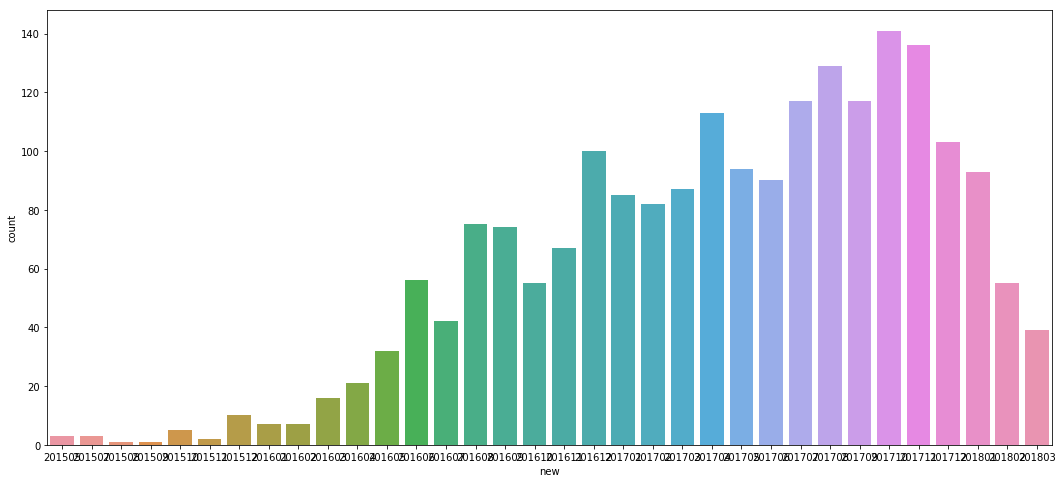

In [99]:
figure, ax1= plt.subplots(nrows=1, ncols=1)

figure.set_size_inches(18, 8)

sns.countplot(data=test1, x="new", ax=ax1)
# sns.countplot(data=test1, x="new")

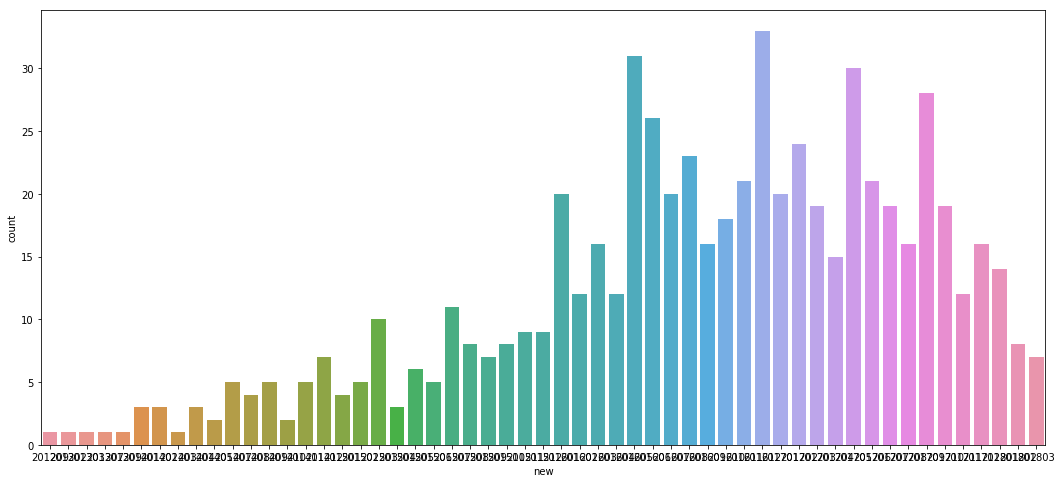

In [100]:
figure, ax1= plt.subplots(nrows=1, ncols=1)

figure.set_size_inches(18, 8)

sns.countplot(data=test2, x="new", ax=ax1)

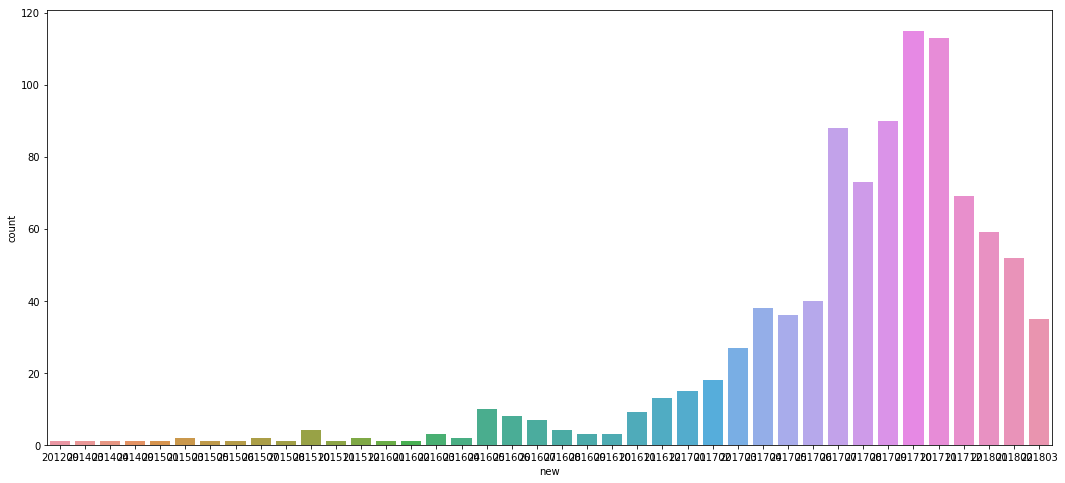

In [101]:
figure, ax1= plt.subplots(nrows=1, ncols=1)

figure.set_size_inches(18, 8)

sns.countplot(data=test3, x="new", ax=ax1)

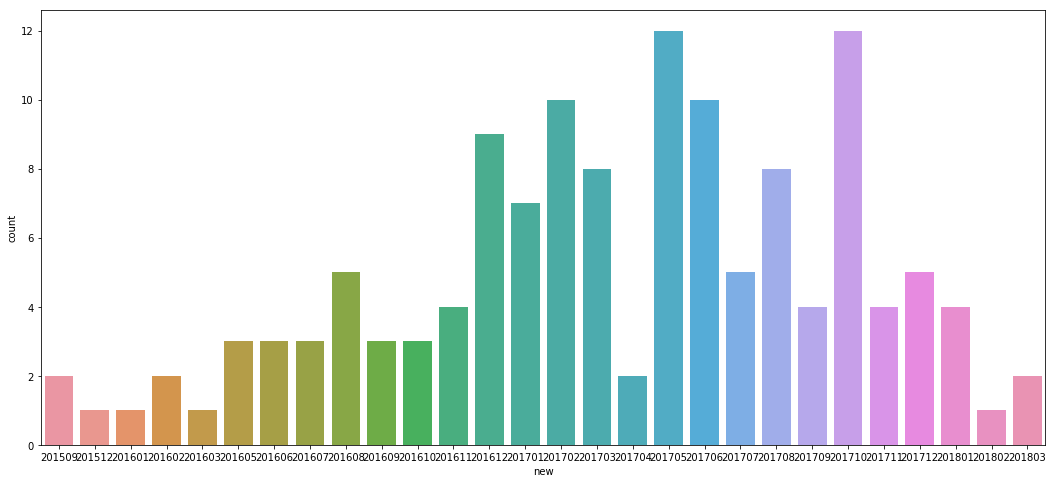

In [102]:
figure, ax1= plt.subplots(nrows=1, ncols=1)

figure.set_size_inches(18, 8)

sns.countplot(data=test4, x="new", ax=ax1)

In [106]:
#태영생막창 1호점 찾기

test2.sort_values('DEAL_DT')[['COMPANY_ID','DEAL_DT','ADDR']].head()

,COMPANY_ID,DEAL_DT,ADDR
925,6652334,2012-09-17 21:09:54,대전 서구 용문동 590-1
286,3634080,2013-02-08 01:05:36,경기 용인시 처인구 모현면 왕산리 428번지
157,935569,2013-03-07 23:28:00,울산 남구 신정동 1220-2
1013,6652345,2013-07-25 21:21:57,경남 밀양시 삼문동 576-6
2799,7873959,2013-09-08 18:40:10,대구 북구 칠성동2가 298-1


In [103]:
test1.to_csv('test1.csv')
test2.to_csv('test2.csv')
test3.to_csv('test3.csv')
test4.to_csv('test4.csv')

In [ ]:
test1= test[test['CO_NAME'].str.contains('청년다방')]
test2= test[test['CO_NAME'].str.contains('태영생막창')]
test3= test[test['CO_NAME'].str.contains('에머이')]
test4= test[test['CO_NAME'].str.contains('감성타코')]

In [53]:
import pandas as pd
import pymysql
import webbrowser
import random
import pickle
import os
from matplotlib import font_manager, rc
import pylab as plot
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas import ExcelWriter
import winsound
import math
import locale
#import feather
from multiprocessing import Pool
from multiprocessing import Process
from functools import partial

def get_revisit_id_range():
    conn = pymysql.connect(host='133.186.135.21', user='eums', password='eums00!q', db='eums', charset='utf8')
#     conn = pymysql.connect(host='133.186.135.222', port=13306, user='eums', password='eums00!q', db='eums-business', charset='utf8')
    curs = conn.cursor(pymysql.cursors.DictCursor)

    queryString = "select MIN(ID) as MIN_ID, MAX(ID) as MAX_ID from MEUMS_COMP_REVISIT_HIS;" 

    curs.execute(queryString)
    p = pd.DataFrame( curs.fetchall() )
    
    conn.close()
    return p.MIN_ID[0], p.MAX_ID[0]

def get_revisit_cj(id_list, comp_id_list):
    conn = pymysql.connect(host='133.186.135.21', user='eums', password='eums00!q', db='eums', charset='utf8')
#     conn = pymysql.connect(host='133.186.135.222', port=13306, user='eums', password='eums00!q', db='eums-business', charset='utf8')
    curs = conn.cursor(pymysql.cursors.DictCursor)

    t1 = datetime.now()
    #queryString = "select * from MEUMS_COMP_REVISIT_HIS where ID in ({}) and COMPANY_ID in ({});".format(','.join(str(i) for i in id_list), ','.join(str(i) for i in comp_id_list))
    queryString = "select * from MEUMS_COMP_REVISIT_HIS where ID in ({});".format(','.join(str(i) for i in id_list))
    #print(queryString)
    curs.execute(queryString)

    try:
        p = pd.DataFrame( curs.fetchall() )
        p = p[p.COMPANY_ID.isin(comp_id_list)]
        print(datetime.now()-t1, len(p), min(id_list), max(id_list))
    except:
        print(datetime.now()-t1, len(p), min(id_list), max(id_list))
        p = pd.DataFrame([])

    conn.close()
    return p

def task_revisit(id_list, company_id_list):
    dfRevisit = get_revisit_cj(id_list, company_id_list)
    return dfRevisit


def dump_revisit(company_id_list):
    chunk_size = 200000
    min_id, max_id = get_revisit_id_range()
    print(min_id, max_id)
    id_list = (range(min_id, max_id+1))
    split_list = [ id_list[x : x+chunk_size] for x in range(0, len(id_list), chunk_size) ]

    with Pool(processes=20) as pool:
        result_list = pool.map(partial(task_revisit, company_id_list=company_id_list), split_list  ) # for operation

    df = pd.concat(result_list)
    pickle.dump(df, open('REVISIT_HIS.DF', 'wb'))
    return df

In [ ]:
df = dump_revisit(List)

1 115093994


In [ ]:
type(List)
len(List)